In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
url='datasets1/Mall_Customers.csv'

In [5]:
df= pd.read_csv(url)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
gender = {'Male': 0,'Female': 1}
df.Gender = [gender[item] for item in df.Gender] 

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [10]:
#preprocessing
from sklearn.preprocessing import StandardScaler
X= df.values[:,1:]
X=np.nan_to_num(X)
Clus_dataset= StandardScaler().fit_transform(X)
Clus_dataset

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

Modeling

In [36]:
#fitting the data
from sklearn.cluster import KMeans
clusterNum=4
K_means= KMeans(init='k-means++',n_clusters=clusterNum,n_init=12)
K_means.fit(X)
labels= K_means.labels_
print(labels)

[0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [37]:
#assigning labels to each row
df['Clus_Km']= labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_Km
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,2
3,4,1,23,16,77,0
4,5,1,31,17,40,2


In [38]:
#checking centroids value by avg of features
df.groupby('Clus_Km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_Km,,,,,
0,28.642857,0.500000,24.821429,28.714286,74.250000
1,162.000000,0.473684,40.394737,87.000000,18.631579
2,71.831579,0.621053,44.894737,48.705263,42.631579
3,162.000000,0.538462,32.692308,86.538462,82.128205


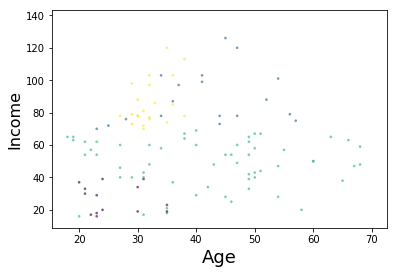

In [39]:
#to plot distribution of customers based on age and income
area= np.pi*(X[:,0])**2
plt.scatter(X[:,1],X[:,2],s=area,c=labels.astype(np.float),alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [40]:
X[:,1]

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18,
       49, 21, 42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 59, 50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68,
       19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21,
       48, 55, 22, 34, 50, 68, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49,
       67, 26, 49, 21, 66, 54, 68, 66, 65, 19, 38, 19, 18, 19, 63, 49, 51,
       50, 27, 38, 40, 39, 23, 31, 43, 40, 59, 38, 47, 39, 25, 31, 20, 29,
       44, 32, 19, 35, 57, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44,
       38, 47, 27, 37, 30, 34, 30, 56, 29, 19, 31, 50, 36, 42, 33, 36, 32,
       40, 28, 36, 36, 52, 30, 58, 27, 59, 35, 37, 32, 46, 29, 41, 30, 54,
       28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30])

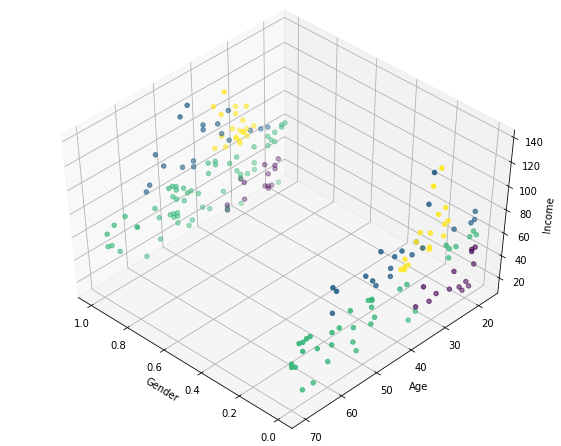

In [41]:
#to plot 3-D view
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(1, figsize=(8,6))
plt.clf()
ax= Axes3D(fig, rect=[0,0,.95,1],elev= 48, azim=134)
plt.cla()
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:,0],X[:,1],X[:,2], c=labels.astype(np.float))

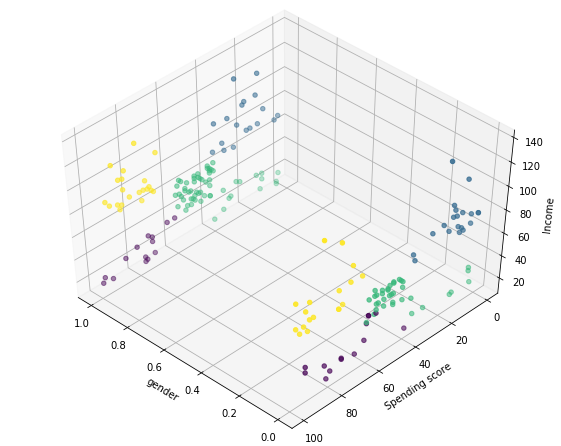

In [42]:
fig= plt.figure(1, figsize=(8,6))
plt.clf()
ax= Axes3D(fig, rect=[0,0,.95,1],elev= 48, azim=134)
plt.cla()
ax.set_xlabel('gender')
ax.set_ylabel('Spending score')
ax.set_zlabel('Income')
ax.scatter(X[:,0],X[:,3],X[:,2], c=labels.astype(np.float))